[Pre-MAP Course Website](http://depts.washington.edu/premap/cohort-18-2022-seminar/) | [Pre-MAP GitHub](https://github.com/UWPreMAP/PreMAP2022) | [Google](https://www.google.com)

### Each time you access the PreMAP2022 directory make sure your files are up to date
1. Open up a terminal tab (New -> Terminal). Change directories into the PreMAP2022 directory, do this via:
```bash
cd PreMAP2022
```
2. Update the directory to get any newly added files by running in the terminal:
```bash
git pull
```
3. If you're having an issue with your ```git pull``` try running ```git fetch``` first!

# Vocabulary for today

<b><ul>
    <li>spline</li>
    <li>resolution</li>
    <li>format string</li>
    <li>keyword arguments</li>
    <li>hex code</li>
    <li>linear spacing</li>
    <li>logarithmic spacing</li>
    <li>subplots</li>
    </ul></b>

# Plotting with `matplotlib` 

*examples in this notebook are based on Nicholas Hunt-Walker's [plotting tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) and Jake VanderPlas' [matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/06_MatplotlibIntro.ipynb) check these out if you want to read more about plotting with matplotlib* 

In this notebook we will learn how to make basic plots, how to customize these plots to display data the way we want to, how to make log-plots, and how to have many plots at once.

`matplotlib` is a huge and incredibly important python library that handles all things plotting. Most of the time you'll only be working with a subset of `matplotlib` called `pyplot`, let's import it!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Remember that because we imported as plt
# then we can call functions with plt.NAME_OF_FUNCTION

# I'm also using this "magic" function to make my plots appear in this notebook
# Only do this when working with Jupyter notebooks
%matplotlib inline

In [2]:
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

## Basic Plot Command

The fundamental function in matplotlibt is `plt.plot(x,y)`. This will plot points and connect them, where the (x,y) values of the points are given by the values in the arrays `x` and `y`.

To start getting plotted let's define an `x` and `y` array.

In [3]:
import numpy as np

In [4]:
x = np.array([1,2,3,4,5])
print(x)

[1 2 3 4 5]


Let's try plotting a relatively simple equation:
$\begin{equation}
y = x
\end{equation}$

we can do this in code by just defining a variable `y` as so

In [5]:
y = x
print(y)

[1 2 3 4 5]


Now that we've got an `x` array and a `y` array, let's see what the `plt.plot` function will do.

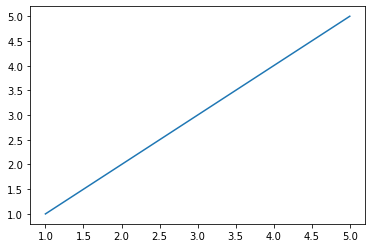

In [6]:
plt.plot(x,y)
# Remember that when you call a function, you must use parentheses
# that enclose around the arguments that the function will take
#But x and y can be called anything.

In [7]:
#Why was it drawing a line when you gave it points.

There it is! $y=x$, your first (of what will likely be many) plot!

$y=x$ is pretty nice, but let's get a little more fancy and try plotting $y = x^2$

In [8]:
y = np.power(x, 2)
#Confused about what's going on in this line? try running the cell below
print(y)

[ 1  4  9 16 25]


In [9]:
np.power?

Call signature:  np.power(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'power'>
File:            /opt/conda/lib/python3.9/site-packages/numpy/__init__.py
Docstring:      
power(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

First array elements raised to powers from second array, element-wise.

Raise each base in `x1` to the positionally-corresponding power in
`x2`.  `x1` and `x2` must be broadcastable to the same shape. Note that an
integer type raised to a negative integer power will raise a ValueError.

Parameters
----------
x1 : array_like
    The bases.
x2 : array_like
    The exponents.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided

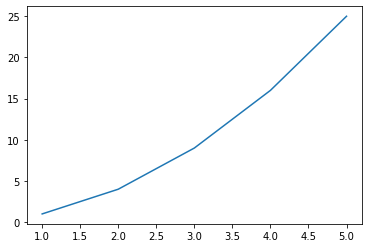

In [10]:
plt.plot(x,y)

In [11]:
#It looks like matplotlib makes straight lines between points. 

That kind of looks like $y=x^2$ but it also looks a little jagged. This is because when `matplotlib` plots something, it actually draws a straight line between the (x,y) points that you give matplotlib. This is called a <b>spline</b>. `matplotlib` can just connect the dots that you give it.

So, to make this more smooth, we need to have many more points. To do that, let's use `np.linspace`

### Example 1: Making an array with `np.linspace`

Run the cell below to load up the `np.linspace` documentation and read about how to use `np.linspace`.

In [12]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

Now, in the cell below, using `np.linspace`, create a new `x` array that has 100 points between 1 and 5. This new `x` array will have a higher <b>resolution</b> than our old `x` array.

[1.         1.04040404 1.08080808 1.12121212 1.16161616 1.2020202
 1.24242424 1.28282828 1.32323232 1.36363636 1.4040404  1.44444444
 1.48484848 1.52525253 1.56565657 1.60606061 1.64646465 1.68686869
 1.72727273 1.76767677 1.80808081 1.84848485 1.88888889 1.92929293
 1.96969697 2.01010101 2.05050505 2.09090909 2.13131313 2.17171717
 2.21212121 2.25252525 2.29292929 2.33333333 2.37373737 2.41414141
 2.45454545 2.49494949 2.53535354 2.57575758 2.61616162 2.65656566
 2.6969697  2.73737374 2.77777778 2.81818182 2.85858586 2.8989899
 2.93939394 2.97979798 3.02020202 3.06060606 3.1010101  3.14141414
 3.18181818 3.22222222 3.26262626 3.3030303  3.34343434 3.38383838
 3.42424242 3.46464646 3.50505051 3.54545455 3.58585859 3.62626263
 3.66666667 3.70707071 3.74747475 3.78787879 3.82828283 3.86868687
 3.90909091 3.94949495 3.98989899 4.03030303 4.07070707 4.11111111
 4.15151515 4.19191919 4.23232323 4.27272727 4.31313131 4.35353535
 4.39393939 4.43434343 4.47474747 4.51515152 4.55555556 4.595959

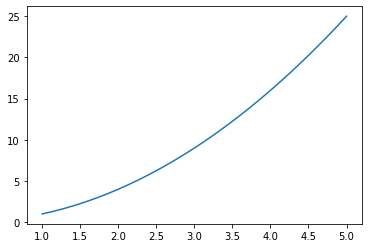

In [13]:
x = np.linspace(1,5,num=100)
print(x)
y = np.power(x, 2)
plt.plot(x,y)

[1. 3. 5.]


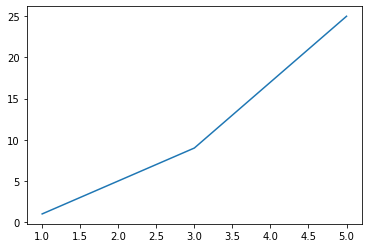

In [14]:
#Very jaggad!
x = np.linspace(1,5,num=3)
print(x)
y = np.power(x, 2)
plt.plot(x,y)

Now, run the cell below to re-define the `y` array with your new `x` values, and plot the result. It should look much less jagged than the $y=x^2$ plot we made earlier.

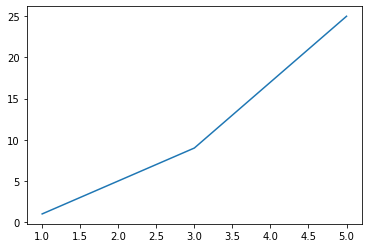

In [15]:
y = np.power(x,2)

plt.plot(x,y)

#See above. All steps are above. The graph below was jaggad.

## Customizing plots

We're going to do everything we can to make the plot above look not only nicer, but customized too. Here's where coding/plotting is more of an art than a science.

The first thing to do here, is actually see the points that `matplotlib` is plotting, rather than the lines it's drawing between those points.

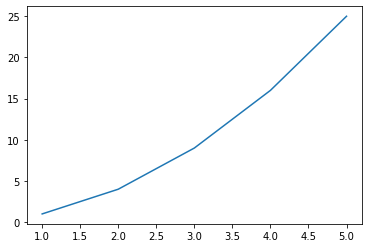

In [16]:
# Make x have lower resolution so we can see the points
x = np.linspace(1,5,5)
y = np.power(x,2)
plt.plot(x,y)

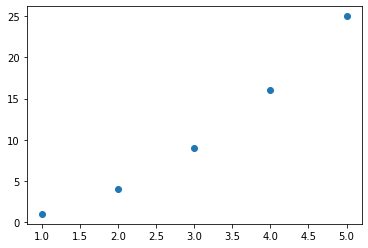

In [17]:
plt.plot(x, y, 'o')

What did I just do to make points appear instead of a line? Well, that extra argument in `plt.plot` is called a <b>format string</b>. You should read about these on the `plt.plot` documentation page, <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">here</a>

### Example 2: Reading the `plt.plot` documentation

Learning how to read documentation is an incredibly important part of coding. Reading the `plt.plot` documentation is especially important, because `plt.plot` is an incredibly powerful and flexible function. Another valuable place to learn about how to do things with `matplotlib` is the <a href="https://matplotlib.org/stable/gallery/index.html">gallery</a> that shows you the source code for making tons of plots and customizing them with `matplotlib`. You might find the format string example in the gallery helpful as well.

Look through the `plt.plot` documentation page above, take a quick glance, and also ctrl+F to search the page for "format string" and see what the documentation page has to say about format strings. With what you've learned from reading, answer the questions below.

<b>1). What are a few "kwargs" (keyword arguments) that you can add to a `plt.plot` function call?

Some of the keyword arguments have to do with 2D line properties, like you can change the line's width, or the color of the line, or what each point is marked with, or the style of the line itself (dashed, spotted, etc.). There are also color, linestyle, linewidth,etc.

<b>2). Edit and run the cell below to plot `x` and `y` data with a format string that will make the marker be star-shaped, the line be dashed, and the color be red.

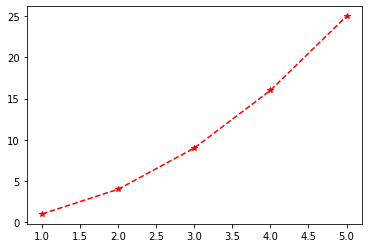

In [18]:
plt.plot(x,y, '*--r')

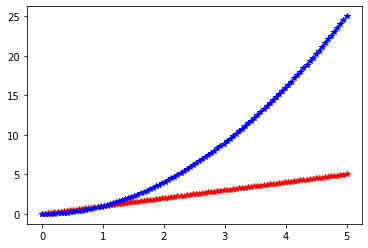

In [19]:
x = np.linspace(0,5,100)

y_line = x
y_parabola = np.power(x,2)

plt.plot(x, y_line, '*--r')
plt.plot(x, y_parabola, '*--b')

#You can put these plt.plot's in a for loop.

### `plt.plot` keyword arguments

As you might have read in the documentation, `plt.plot` has a ton of <b>keyword arguments</b> that you can use to customize your plots. 

A <b>keyword argument</b> is an argument that is optional to a function, and must be explicitly declared when you're calling the function. For example, for the keyword argument `color`, we must explicitly say `color=NAME_OF_COLOR` in `plt.plot`, as below:

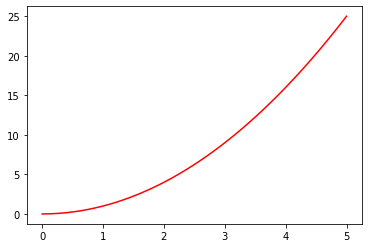

In [20]:
x = np.linspace(0,5,100)
y = np.power (x,2)
plt.plot(x,y, color = "Red")

Note, you can specify a color with a name, or a <b>hex code</b>. There are many websites that will give you the hexcode that represents a color, for example <a href="https://htmlcolorcodes.com/">this one</a>.

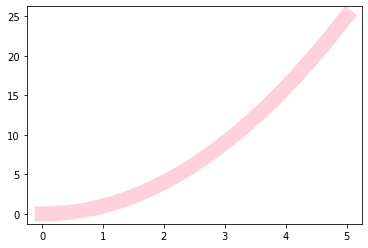

In [21]:
plt.plot(x, y, color = "#FFD1DC", linewidth = 15)
# This hexcode corresponds to the so-called "millennial pink"
# We also made the line thicker so we can see it better

`plt.plot`'s keyword arguments can do what format strings can do, and even more. For example, let's create the plot from example 2.2 but with keyword arguments instead of format strings and we can even make the markers bigger.

If you'd like, feel free to edit the keyword arguments in the cell below, or add some as well!

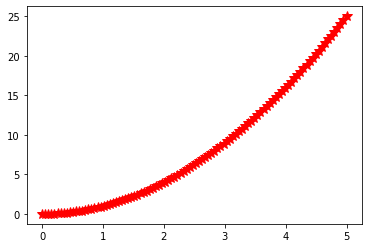

In [22]:
plt.plot(x, y, marker = '*', markersize = 10, color = 'red', linestyle = '--') #Can play around with this.

### The label kwarg and the legend

An important keyword argument is `label`. This will tell `matplotlib` what to call the line that you're plotting in a legend. This is especially important because we can plot many lines in one figure. For example:

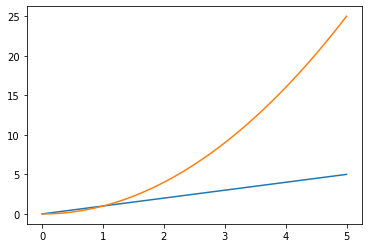

In [23]:
parabola = np.power(x, 2)
linear = x

# The label is just a string that labels that particular plot
plt.plot(x, linear, label = "y = x")
plt.plot(x, parabola, label = "y = x^2")

To make those labels appear, we call a new function, called `plt.legend()`

Text(0.5, 0, 'x values')

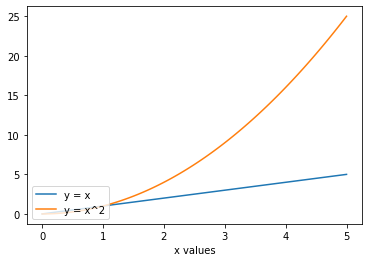

In [24]:
plt.plot(x, linear, label = "y = x")
plt.plot(x, parabola, label = "y = x^2")

plt.legend(loc = 'lower left')
plt.xlabel("x values")

You can move the legend around too, with the `loc` keyword argument. 

Take a look at the legend documentation <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html">here</a> and then,
edit the cell above by adding the `loc` keyword argument into `plt.legend` to move the legend to a different part of the plot.

## Customizing the axes

Now that we've learned how to customize the actual lines you're plotting, let's customize the axes. Remember that labeling your axes is super important in science. You want to label them with what they represent and what their units are.

For this part of the lesson, we've included some data for you to use. You have access to three arrays, each of which has 451 elements and represents the value of some variable at a certain time in the evolution of a planet.

`Time`: Is an array that gives the time of each index. The units are in billions of years.

`AtmosphericWater`: Is an array where every element represents the amount of water in the atmosphere of this modeled planet at each time. Is in units of terrestrial oceans (1 terrestrial ocean = 1.39e21 kg of water).

`MantleTemp`: Is an array where every element represents the temperature of the modeled planet's mantle at each time. Is in units of Kelvin.

`EruptionRate`: Is an array where every element represents the rate of magma being erupted at that time. Is in units of kilograms per second.

In [25]:
# Run this cell, but don't edit it
#we'll talk more about what this cell means on Wednesday
import pandas as pd

data = pd.read_csv("data/PlanetEvolution.csv")

# Time of evolution, units are Gigayears (Billions of years)
Time = data['Time'].values
print(Time)

# Amount of water in atmosphere, units are terrestrial oceans (1 TO = 1 ocean's worth of water)
AtmosphericWater = data['SurfWaterMass'].values
print(AtmosphericWater)

# Temperature of mantle, units are Kelvin
MantleTemp = data['TMan'].values

# Rate at which magma is erupted, units are kilograms per second
EruptionRate = data['EruptionRate'].values

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

To start, let's plot the amount of water in the atmosphere of the modeled planet as a function of time.

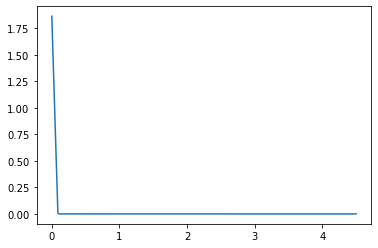

In [26]:
plt.plot(Time, AtmosphericWater)

### Example 3: Labeling Axes

Let's label our axes. Look up/google how to label axes in matplotlib to figure out how. Then, edit the code in the cell above to add labels to the x, and y axes that describe what those axes mean and what units each axis is in.

Your stretch goal here should be to change the fontsize of the labels to make, in your opinion, the text a good size.

Text(0, 0.5, 'Water in Atmosphere (TO)')

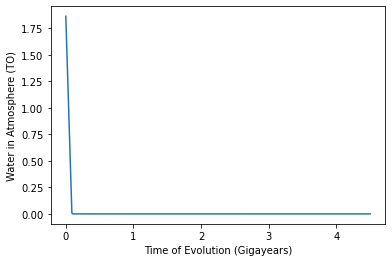

In [27]:
plt.plot(Time, AtmosphericWater)
plt.xlabel("Time of Evolution (Gigayears)")
plt.ylabel("Water in Atmosphere (TO)")

### Example 4: Log scaling data

Looking at the plot that you've made, what does it look like the amount of water in the atmosphere is at 4.5 billion years? Type it in the text cell below

It looks like the amount of water in the atmosphere is 0.

The amount of water in the atmosphere at 4.5 billion years is the same thing as the amount of water in the atmosphere at the end of the simulation, because the simulation models 4.5 billion years of evolution.

In the cell below, print the value of the last element of the `AtmosphericWater` array? Is it close to the estimate you made by looking at the plot?

In [28]:
AtmosphericWater[-1]

1.232449e-05

The issue here is that the y axis is in <b>linear spacing</b>, this means that the spaces between ticks are linear (e.g., 1.5 -> 1.25 -> 1.0). This is great for viewing data that might be linearly spaced apart, but we can see that if the data goes from large to small numbers, it can be hard to estimate what the data is doing when it reaches those small valuables. 

Using linear spacing on the y axis in our plot makes it look like the final amount of water in the atmosphere is 0 terrestrial oceans, when it's actually 1.23e-05 TO's (which is close to the amount of water in Lake Superior, that's not a lot for a whole atmosphere but it is different than 0).

When you want to have small numbers and large numbers visible on the same axis, you should use <b>logarithmic spacing</b> not <b>linear spacing</b>. Logarithmic spacing means that the spaces between ticks are in powers of 10 (e.g., 1 -> 10 -> 100).

In the cell below, copy and paste your code plotting AtmosphericWater over Time with the axes labeled. Then, edit your code to change the y axis to a log scale (you'll have to google how to do this). What does the final value of AtmosphericWater look like when the figure is plotted in a log scale?

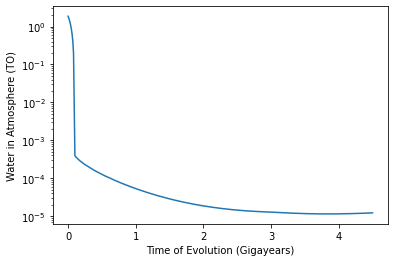

In [29]:
plt.plot(Time, AtmosphericWater)
plt.xlabel("Time of Evolution (Gigayears)")
plt.ylabel("Water in Atmosphere (TO)")
plt.yscale('log')

In [30]:
?plt.xscale

Signature: plt.xscale(value, **kwargs)
Docstring:
Set the x-axis scale.

Parameters
----------
value : {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`
    The axis scale type to apply.

**kwargs
    Different keyword arguments are accepted, depending on the scale.
    See the respective class keyword arguments:

    - `matplotlib.scale.LinearScale`
    - `matplotlib.scale.LogScale`
    - `matplotlib.scale.SymmetricalLogScale`
    - `matplotlib.scale.LogitScale`
    - `matplotlib.scale.FuncScale`

Notes
-----
By default, Matplotlib supports the above mentioned scales.
Additionally, custom scales may be registered using
`matplotlib.scale.register_scale`. These scales can then also
be used here.
File:      /opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py
Type:      function


### Example 5: Subplots

<b>Subplots</b> are a way put multiple plots in what amounts to the same figure; think of subplots like an array of plots! You can read more about the `plt.subplots` syntax [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The syntax for setting labels and titles can be slightly different when using subplots than when making just one plot. I tend to use `plt.subplots` for all my plotting, even with just one plot. If you don't specify `nrows` and `ncols`, you will just produce one plot.

Subplots are great for displaying multiple data that share an x or y axis. For this example, let's make two subplots in one column. On the top we will plot AtmosphericWater by Time, and on the bottom plot we will plot the MantleTemp by Time, that way we can see how the AtmosphericWater as the planet's mantle is cooling. You can find how to plot something using subplots by looking at the <a href="https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-demo-py">subplot demo</a> in the matplotlib gallery

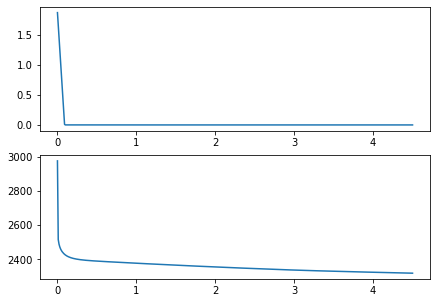

In [38]:
#set up a variable for the total figure, and for each subplot axis
fig = "Characteristics of Planet Evolution"
x1 = Time
y1 = AtmosphericWater
x2 = Time
y2 = MantleTemp
#figsize sets up the size of the total figure. You can play around with these 

# values to see what they do

# nrows and ncols define the number of rows and columns, respectively
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))

#Plot Time and AtmosphericWater on the first axis, ax[0]
ax1.plot(x1,y1)
ax1.set_xlabel("Time of Evolution in Gigayears")
ax1.set_ylabel("Atmospheric Water in TO")
ax2.plot(x2,y2)
ax2.set_xlabel("
ax2.
#Set the y axis for ax[0] to be logarithmically scaled
#The syntax for setting x and y labels is slightly different 
#when you're calling it on an individual axis

#Plot Time and MantleTemp on the second axis, ax[1]

You can do fancier things with subplots like have different plots share the same axis, put smaller plots as insets to larger plots, etc. Again, take a look at things like the matplotlib library for examples of different plots. 